# Derin Öğrenme Nedir?

Özellikle **derin yapay sinir ağları**nı kullanan, veri öğrenme yöntemlerinden birisidir

# Derin Öğrenme Neden Bu Kadar Popüler?

Diğer makine öğrenmesi yöntemlerine ile karşılaştırıldığında veri sayısı arttıkça derin öğrenme modellerinin başarısı artmaktadır. Klasik makine öğrenmesi modellerinin başarısı/performansı sınırlıdır ve doyum noktasına ulaştıktan sonra başarıları daha fazla geliştirilemez

<img src="http://preview.ibb.co/d3CEOH/1.png"></a>

# Derin Öğrenme Neden Yakın Geçmişte Bu Kadar Popüler Oldu?

Yapay sinir ağlarının eğitim süreci **büyük veri**ye ve **güçlü donanım**lara ihtiyaç duyar.

# Büyük Veri Ne Kadar Büyüktür?

Bir çok alanda genel olarak 1 milyon veri noktasından daha fazla veriye sahip olan veri setleri büyük veri olarak adlandırılabilir.

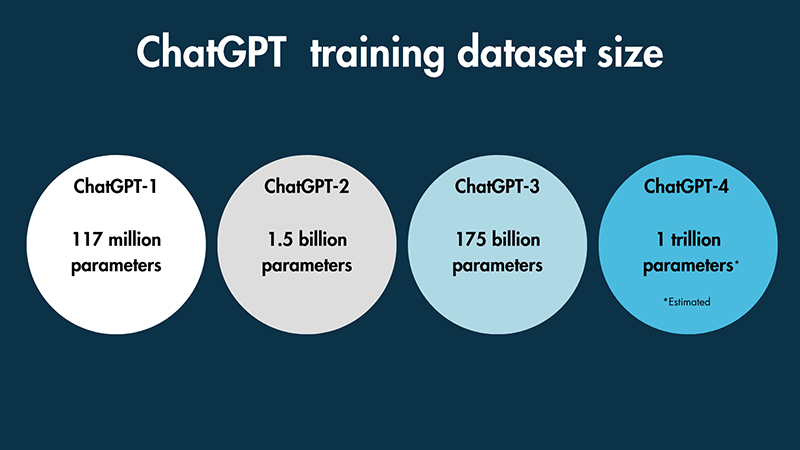

# Derin Öğrenme Modellerinin Gücü Nereden Geliyor?

Klasik makine öğrenmesi modelleri sadece verilen girdileri kullanarak karar verirken derin öğrenme modelleri verilen girdiler ile yeni ve daha kullanışlı öznitelikleri kendisi üretebilir ve bu yeni özniteliklere göre karar verebilir.

<img src="http://preview.ibb.co/hgpNAx/2.png">

# Derin Öğrenmenin Temeli: Lojistik Regresyon

Lojistik regresyon, sonucu 0 ile 1 arasında olan bir denklemdir.

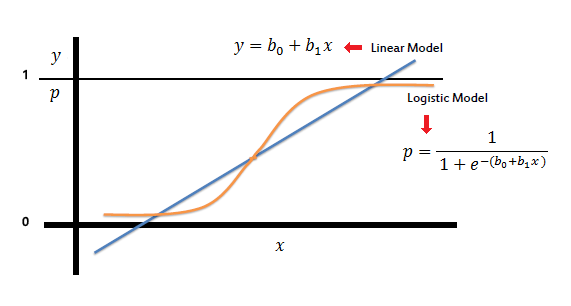

Lojistik regresyon denkleminin sonucu belirli bir eşik değerinin altında ise 0, üzerinde ise 1 olarak kabul edilerek sınıflandırma yapılabilir.

# Sklearn ile Lojistik Regresyon 

In [32]:
# Verilerimizi Oluşturalım
import numpy as np
observation_count = 201
x_var = np.linspace(start = -10, stop = 10, num = observation_count)
np.random.seed(42)
noise_var = np.random.normal(size = observation_count, loc = 0, scale = 3)
y_var = np.where(x_var + noise_var >= 0 , 1, 0)

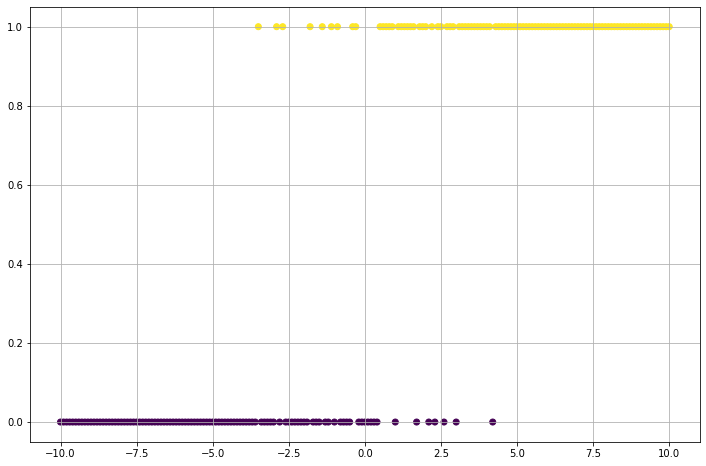

In [33]:
# Veriyi Görselleştirelim
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.scatter(x_var, y_var, c = y_var)
plt.grid(True)

In [34]:
# Veriyi Train ve Test Olarak Ayıralım
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(x_var.reshape(-1,1), y_var, test_size = .2)

In [35]:
# Modeli Oluşturalım
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [36]:
# Modeli Eğitelim
lr = lr.fit(X_train, y_train)

In [37]:
# Model Sonucunu Test Edelim
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [38]:
# Modelimin Matematiksel Çıktısını Görmek için...
t = np.linspace(start = -10, stop = 10, num = 1000)
y_actual = 1 / (1 + np.exp(-1 * lr.coef_.item() * t))

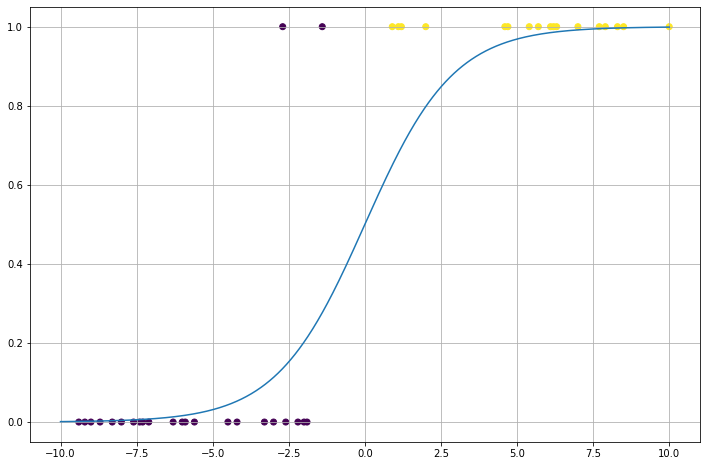

In [39]:
# Eğitilen Model Ve Test Sonuçları
plt.figure(figsize=(12,8))
plt.scatter(X_test, y_test, c = y_pred)
plt.plot(t,y_actual)
plt.grid(True)

In [41]:
# Model Başarımızı Görelim
lr.score(X_test, y_test)

0.9512195121951219

# Çok Boyutlu Verilerde Logistic Regression Kullanmak

In [42]:
# Temel Bir Veri Setini Yükleyelim
from sklearn.datasets import load_digits
digits = load_digits()

In [43]:
# Veri Setinin Boyutlarına Bakalım
digits.images.shape, digits.target.shape

((1797, 8, 8), (1797,))

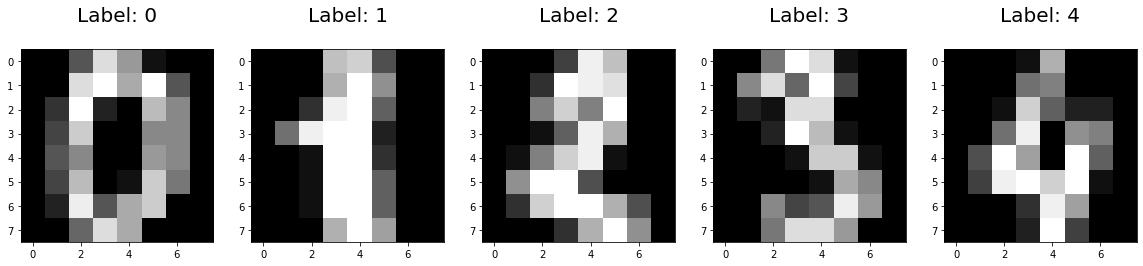

In [44]:
plt.figure(figsize=(20,8))
for index, (image, label) in enumerate(zip(digits.images[0:5], 
                                           digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title('Label: %i\n' % label, fontsize = 20);

In [45]:
# Veri Setini Eğitim ve Test Olarak Ayıralım
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, 
                                                    digits.target,
                                                   test_size=0.25,
                                                   random_state=0)

In [46]:
# Ayrılmış Veri Setine Bakalım
X_train.shape, X_test.shape

((1347, 64), (450, 64))

In [47]:
# Modelimizi Oluşturalım
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        max_iter=10000,
                        C=50)

In [48]:
# Zaman Tutarak Eğitim Yapalım
%time lr = lr.fit(X_train, y_train)

Wall time: 23.9 s


In [49]:
# Modelimizin Parametreleri Ne Anlama Geliyor Bir Düşünelim
print(lr.coef_.shape)
print(lr.intercept_.shape)

(10, 64)
(10,)


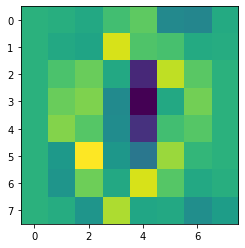

In [50]:
# Model Parametrelerini Daha da Anlamlandıralım
coef = lr.coef_.copy()
plt.imshow(coef[0].reshape(8,8).round(2));

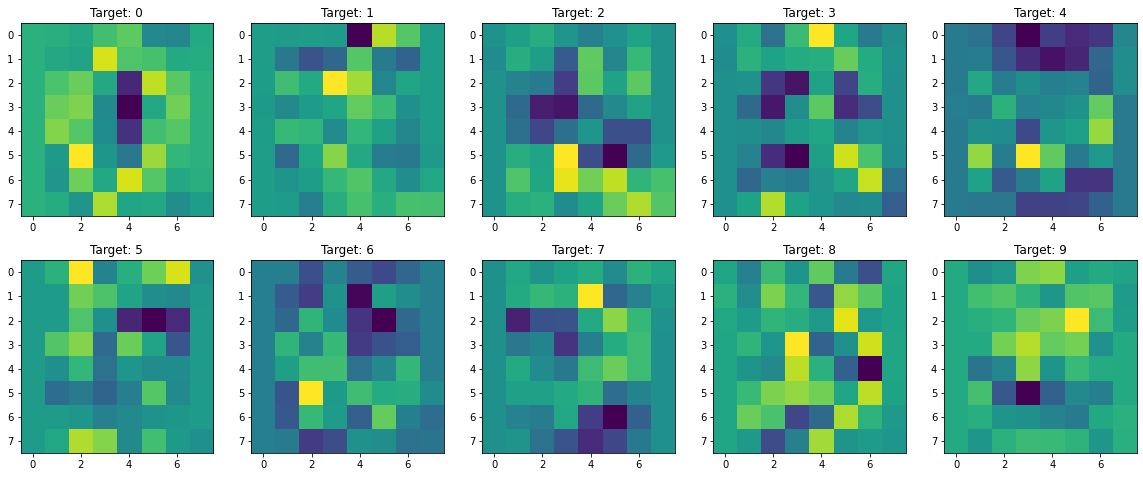

In [51]:
# Model İçerisindeki 10 Farklı Yapıyı Değerlendirelim
plt.figure(figsize=(20,8))
for index, coef in enumerate(lr.coef_):
    plt.subplot(2, 5, index + 1)
    plt.imshow(coef.reshape((8,8)).round(2));
    plt.title(f'Target: {lr.classes_[index]}');

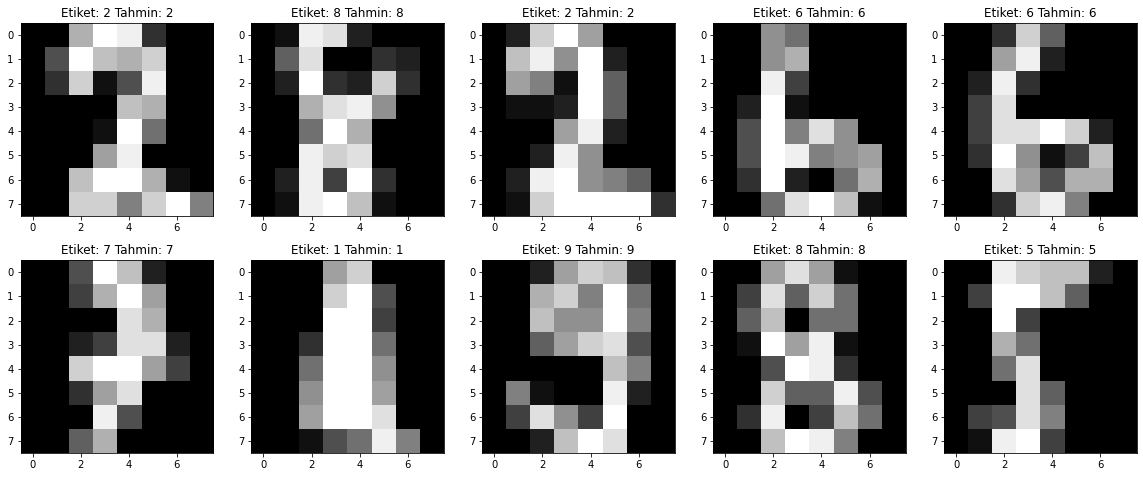

In [52]:
# Modelimizi Çalıştıralım
tahminler = lr.predict(X_test[0:10])
etiketler = y_test[0:10]

# Görselleştirelim
plt.figure(figsize=(20,8))
for index, (test_image, label) in enumerate(zip(X_test[0:10], 
                                           y_test[0:10])):
    plt.subplot(2, 5, index + 1)
    plt.imshow(test_image.reshape(8,8), cmap=plt.cm.gray)
    
    plt.title(f'Etiket: {etiketler[index]} Tahmin: {tahminler[index]}');

In [53]:
# Eğitimimiz Ne Kadar Başarılı
lr.score(X_train, y_train)

1.0

In [54]:
# Testlerimiz Ne Kadar Başarılı
lr.score(X_test, y_test)

0.9466666666666667

In [23]:
# Biz Nerede Hata Yaptık, Bakalım

predictions = lr.predict(X_test)

misclassified_images = []
for index, (label, predict) in enumerate(zip(y_test, predictions)):
    if label != predict: 
        misclassified_images.append(index)
print("Hata Yapılan Görsel Numaraları:")
print(misclassified_images)
print("Hata Yapılan Görsel Sayısı:")
print(len(misclassified_images))

Hata Yapılan Görsel Numaraları:
[56, 90, 94, 118, 122, 124, 130, 140, 169, 181, 196, 213, 218, 235, 251, 315, 325, 331, 335, 378, 398, 425, 429, 440]
Hata Yapılan Görsel Sayısı:
24


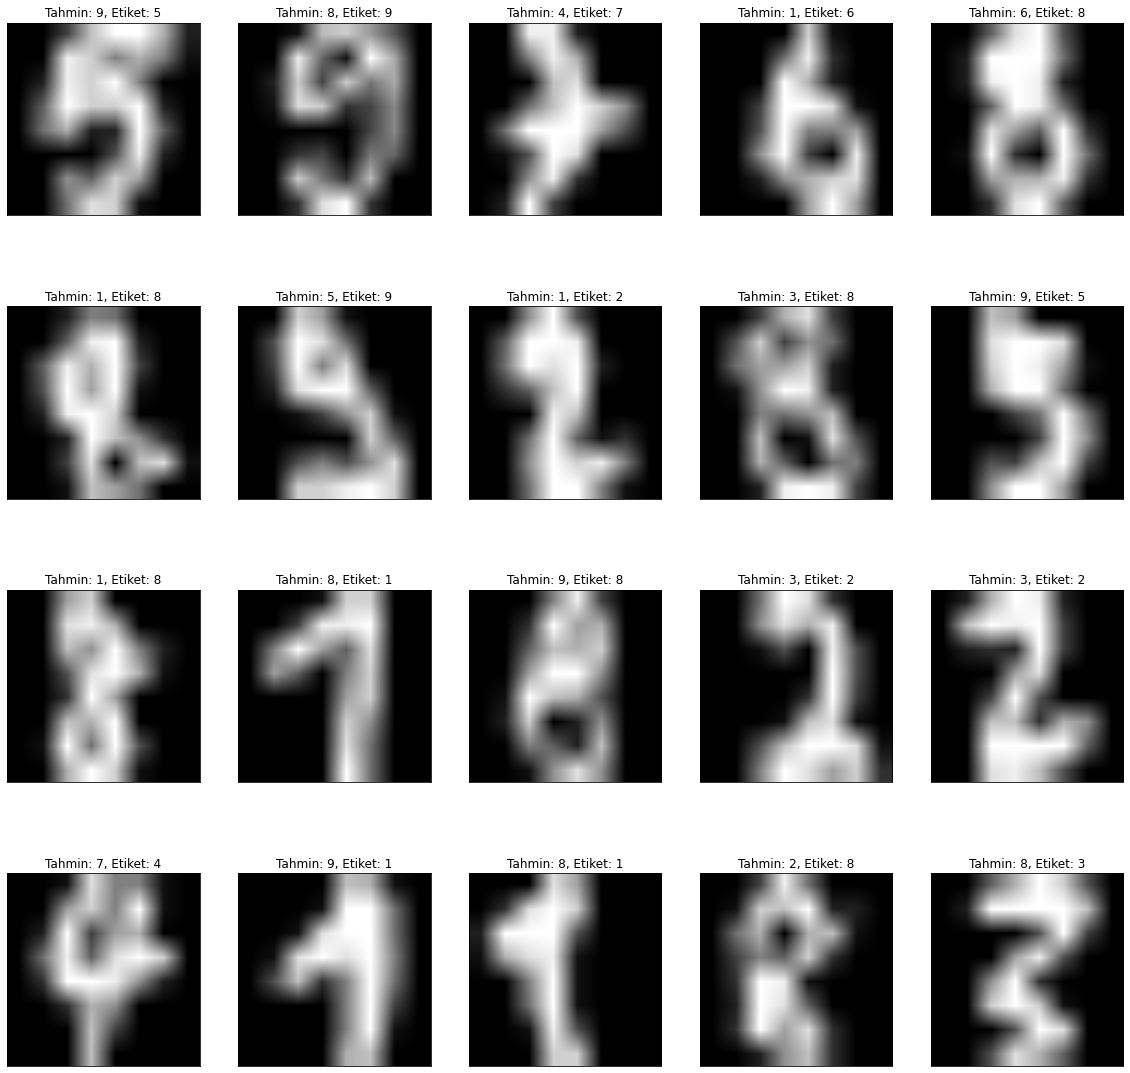

In [24]:
# Biz Nerede Hata Yaptık, Görelim

plt.figure(figsize=(20,20))

for plot_index, bad_index in enumerate(misclassified_images[0:20]):
    p = plt.subplot(4,5, plot_index+1)
    
    p.imshow(X_test[bad_index].reshape(8,8), cmap=plt.cm.gray,
            interpolation='bilinear')
    p.set_xticks(()); p.set_yticks(())
    
    p.set_title(f'Tahmin: {predictions[bad_index]}, Etiket: {y_test[bad_index]}');

# Sinir Ağlarına Giriş

### Perseptron Nedir? Aktivasyon Fonksiyonu Nedir?

Yapay sinir ağlarının en küçük birimine verilen genel isimdir.

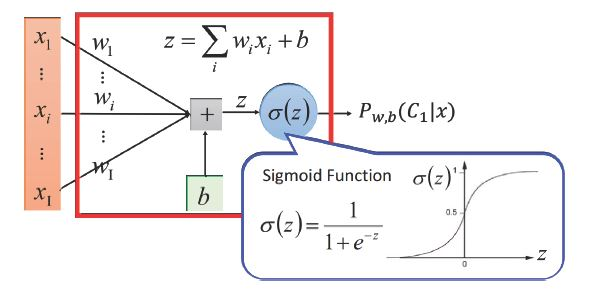

Lojistik regresyonda olduğu gibi eğer **aktivasyon fonksiyonu** sigmoid olur ise sonuç 0 ile 1 arasında olacaktır ve bu değer bir olasılık değeri olarak değerlendirilebilir.

Perseptron'ların **aktivasyon fonksiyon**u sigmoid olmak zorunda değildir. Çok çeşitli amaçlar ile çok farklı aktivasyon fonksiyonlar üretilip kullanılmaktadır. Bugün sıklıkla yapay sinir ağı eğitimlerinde ara katmanlarda kullanılan aktivasyon aktivasyon fonksiyonu **ReLU**'dur.

$$ ReLU(x) = max(0,x) $$

$$ veya $$

$$
ReLU({y_{in}}) = y  =
\begin{cases}
x, & \text{if $x > 0 $} \\
0, & \text{if $x \leq 0$}
\end{cases}
$$

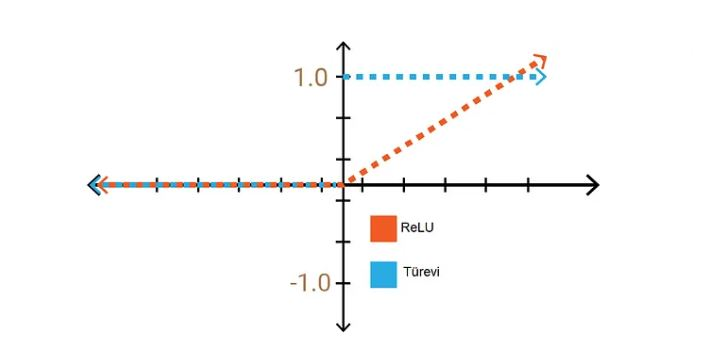

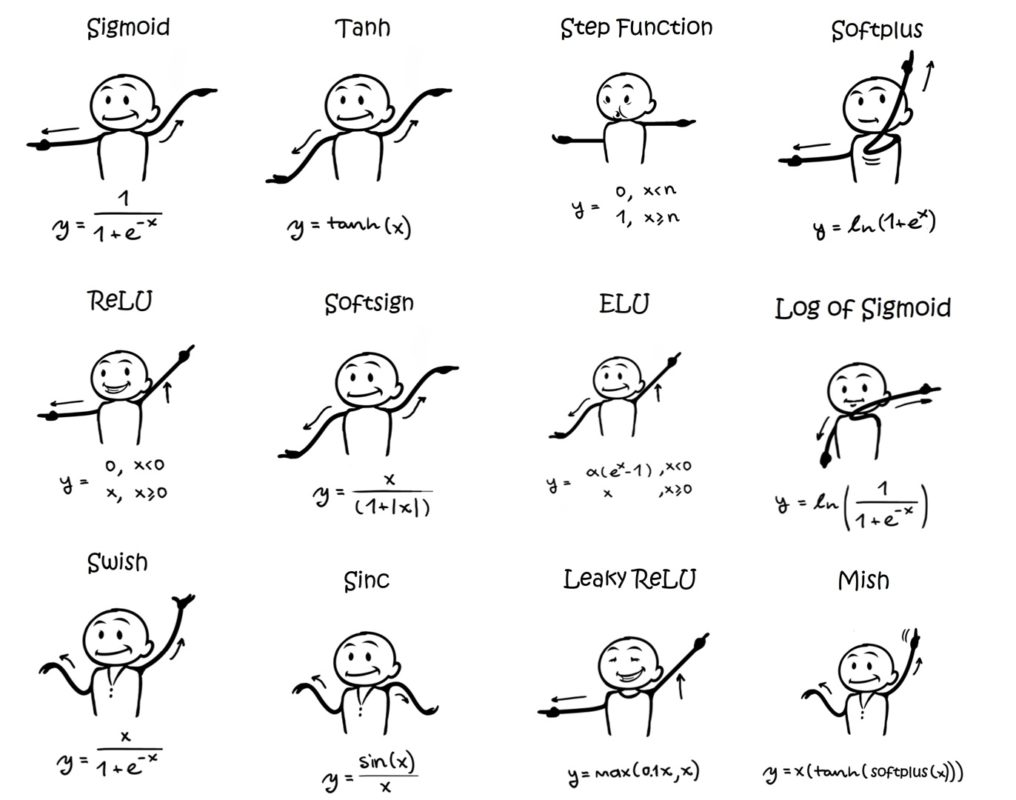

Aktivasyon fonksiyonlarının türevlenebilir olması zorunludur çünkü eğitimler sırasında türevin kolay hesaplanabilir ve belirli olması önemlidir. Türevsiz bir nokta eğitimi engeller. Hatırla: **Gradyan Azalma (Gradient Descent)**

Soru: ReLU'nun türevsiz bir noktası var mı?

# Perseptronlar ile Yapay Sinir Ağı Oluşturmak

Perseptronlar ile üretilen değerler başka bir perseptron'a girdi olarak verilebilir. Bu durumda en basit hali ile bir yapay sinir ağı mimarisi elde edilmiş olur.

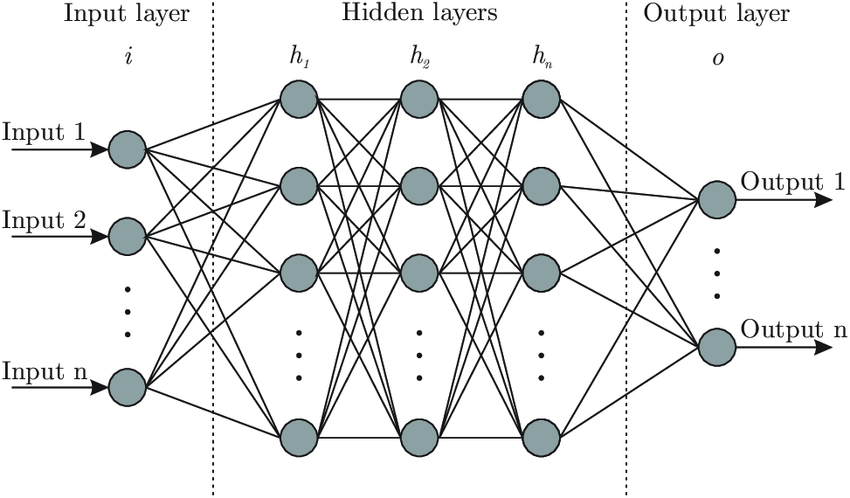

<img src="http://preview.ibb.co/dajVyH/9.jpg">

Not: Modern mimarilerde bir perseptron çıktısı katmanından diğerine geçerken arada başka katmanlar/işlemler ile değerler manipule edilebilmektedir. Bu katmanlara bu derste değinilmeyecektir.

# Peki Neden Perseptron'ları Birbirine Bağlıyoruz? Ne İşe Yarıyor?

**Universal Approximation Theorem**'e göre linear olmayan bir aktivasyon fonksiyonu(Sigmoid, Tanh, ReLU...) ve yeterli sayıda hücre sayısı olan tek saklı katmanlı bir sinir ağı bile tüm devamlı fonksiyonları ifade edebilmektedir.

Yani probleme özel model seçerek veriye uygun matematiksel denklemi bulmaya çalışmak yerine **akla gelebilecek (ve daha fazlası) tüm matematiksel denklemleri aynı anda deniyoruz!**

Peki "yeterli sayıda hücre" ne demek? Milyon($10^{6}$), Milyar($10^{9}$), Milyar kere Milyar($10^{18}$), Milyar üzeri Milyar($10^{9000000000}$)

Bu sayılar ulaşmak mümkün olmadığı için gizli katman sayısını arttırmak gerekiyor.

# Gizli Katman Sayısının Artması Ne İşe Yarıyor?

Bir gizli katmanda üretilen bilgi bir sonraki katmanda kullanılabilmektedir.

Girdi katmanına yakın olan gizli katmanlar daha basit öznitelikleri tespit ederken, sonraki katmanlar bu öznitelikleri kullanarak daha karmaşık öznitelikleri daha kolay bulabilir hale gelirler.

<img src="http://preview.ibb.co/mpD4Qx/10.jpg">

Yukarıda görüldüğü gibi, ilk gizli katman, görseldeki kenarların nerede bulduğunu tespit etmiş, sonraki katman da bu kenar bilgisini kullanarak şekilleri tespit etmiştir.

# Faydalı Bir Site...

[Playground](https://playground.tensorflow.org/)

# Torch ile Regresyon 

In [ ]:
# import module
import torch

In [ ]:
# Create class
class One_Hidden_Layer_Neural_Network(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(One_Hidden_Layer_Neural_Network, self).__init__()
        self.linear_1   = torch.nn.Linear(input_dim, hidden_dim) 
        self.activation = torch.nn.ReLU()
        self.linear_2   = torch.nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = self.linear_2(self.activation(self.linear_1(x)))
        return out
    
    def show_parameters(self):
        for name, param in self.named_parameters():
            if param.requires_grad:
                print(name, param.data)

In [ ]:
# Class object üretelim
neural_network = One_Hidden_Layer_Neural_Network(4,3,1)

Aşağıdaki görsel bir resimdir, yukarıdaki kod ile üretilmemiştir.

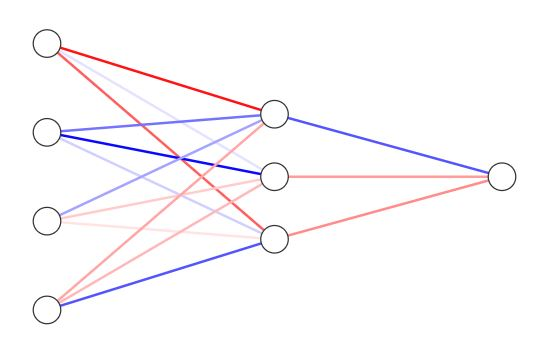

In [ ]:
# Class Object'in içinde ne var?
neural_network

In [ ]:
# Sinir ağımızın içindeki "ağırlıklara" veya "parametrelere" bakalım
neural_network.show_parameters()

In [ ]:
# import modules
import pandas as pd
import numpy as np

In [ ]:
# Veriyi okuyalim
housing_data = pd.read_csv("Housing.csv")

In [ ]:
# Veri boyutunu görelim
print(housing_data.shape)

In [ ]:
# Verinin başına bir bakalim
housing_data.head()

In [ ]:
# Verinin bir de sonuna  bakalim
housing_data.tail()

**Soru** : furnishingstatus özniteliği için 
- unfurnished = 0,
- semi-furnished = 1,
- furnished = 2

demek ne kadar doğrudur?

In [ ]:
# get_dummies() -> Discreate veri ile nasıl başa çıkılır
housing_data = pd.get_dummies(housing_data)

In [ ]:
# get_dummies() ile veriseti nasıl değişti 
housing_data.head()

In [ ]:
# Verisetinden model girdilerini ve model hedeflerini alalim
housing_data_y = housing_data.to_numpy()[:,0]
housing_data_x = housing_data.to_numpy()[:,1:]

In [ ]:
# Hedef'in boyutu
housing_data_y.shape

In [ ]:
# Girdi'nin Boyutu
housing_data_x.shape

In [ ]:
# Girdi ve Hedefleri torch.Tensor yapalim
housing_data_y_tensor = torch.from_numpy(housing_data_y).float().reshape(-1,1)
housing_data_x_tensor = torch.from_numpy(housing_data_x).float()

In [ ]:
# Yapay Sinir Ağı Modelimizi Oluşturalim
model = One_Hidden_Layer_Neural_Network(20,100,1)

In [ ]:
# Eğitilmemiş modelimizi bir deneyelim
model(housing_data_x_tensor)

In [ ]:
# Model parametrelerini güncelleyen optimizer'imizi oluşturalim
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
# Hata Fonksiyomuzu Belirleyelim
criterion = torch.nn.MSELoss()

In [ ]:
# Eğitimi yapalim

max_epochs = 100

all_loss = []

for epoch in range(max_epochs):
    # Okuma kolayligi icin...
    inputs = housing_data_x_tensor
    labels = housing_data_y_tensor

    # Model parametreleri üzerinde daha önceden yapılan gradyan işlemini unut
    optimizer.zero_grad() 

    # Modeli calistir
    outputs = model(inputs)

    # Hatayi hesapla
    loss = criterion(outputs, labels)

    # hata fonksiyonunu azaltacak yonu belirlemek icin model parametrelerinin turevini al
    loss.backward()
    
    # Hatanın zamana gore grafigini cizdirmek icin hatalari bir listede toplayalim
    all_loss.append(loss.item())

    # Model parametrelerini guncelle
    optimizer.step()

    print(f'epoch {epoch}, loss {loss.item()}')

In [ ]:
# Hatamızı Görselleştirelim
import matplotlib.pyplot as plt
plt.plot(all_loss)

# Peki Yapay Sinir Ağı Nasıl Öğrendi? Back Propogation (Geri Yayılım) Nedir?

**Backpropagation** (Geri yayılım) algoritması, **chain rule** (zincir kuralı) ve **gradient descent** (gradyan iniş) olarak adlandırılan bir teknik kullanarak ağırlık alanındaki hata fonksiyonunun minimum değerini arar. Hata fonksiyonunu en aza indiren ağırlıkların öğrenme problemine bir çözüm olduğu düşünülmektedir.

$$ 
h = 3x + 5 \\
x = 20y - 3 \\
\frac{dh}{dy} = ?
$$

---

$$
\frac{dh}{dy} = \frac{dh}{dx}\ \frac{dx}{dy}
$$

---

Kuralın **Daha** Genel Hali

$$
\frac{dy}{dx} = \frac{dy}{da_{1}}\ \frac{da_{1}}{dx} + \frac{dy}{da_{2}}\ \frac{da_{2}}{dx}
$$

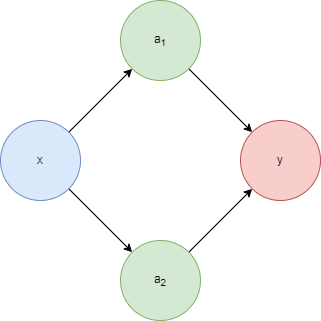

[Faydalı Link](https://www.youtube.com/watch?v=tIeHLnjs5U8&ab_channel=3Blue1Brown)

Soru: Bir veri Seti için
- bazı girdiler 10 ve 100 arasında 0.1 aralıklarla değişiyor
- bazı girdiler de 10_000 ile 100_000 arasında 1_000 aralıklarla değişiyor.

Model için bu durum:
1. Eğitimi Zorlaştırır mı?
2. Eğitimi Etkilemez mi?

# Standardizasyon Nedir?

In [ ]:
#StandardScaler
from sklearn.preprocessing import StandardScaler
import numpy as np

a = np.random.random((10, 3))
a = a*20
print("Standardizasyondan Önce")
print(a)
print()

scaler = StandardScaler()


# Standardizasyon 
print("Standardizasyondan Sonra")
standart_a = scaler.fit_transform(a)
print(standart_a)

In [ ]:
# Girdi icin StandardScaler() objesi
x_scaler = StandardScaler()

In [ ]:
# Hedef icin StandardScaler() objesi
y_scaler = StandardScaler()

In [ ]:
# Girdiyi standardize edip yine torch.Tensor yapalim
housing_data_x_tensor_standart = torch.from_numpy(x_scaler.fit_transform(housing_data_x_tensor)).float()

In [ ]:
# Girdiyi standardize edip yine torch.Tensor yapalim
housing_data_y_tensor_standart = torch.from_numpy(y_scaler.fit_transform(housing_data_y_tensor)).float()

In [ ]:
# Bir model daha olusturalim
model_2 = One_Hidden_Layer_Neural_Network(20,100,1)

In [ ]:
# Bir optimizer daha olusturalim
optimizer_2 = torch.optim.Adam(model_2.parameters())

In [ ]:
# Bir kriter daha olusturalim
criterion_2 = torch.nn.MSELoss()

In [ ]:
max_epochs = 100

all_loss = []

for epoch in range(max_epochs):
    # Okuma kolayligi icin...
    inputs = housing_data_x_tensor_standart
    labels = housing_data_y_tensor_standart

    # Model parametreleri üzerinde daha önceden yapılan gradyan işlemini unut
    optimizer_2.zero_grad() 

    # Modeli calistir
    outputs = model_2(inputs)

    # Hatayi hesapla
    loss = criterion_2(outputs, labels)

    # Hata fonksiyonunu azaltacak yonu belirlemek icin model parametrelerinin turevini al
    loss.backward()
    
    # Hatanın zamana gore grafigini cizdirmek icin hatalari bir listede toplayalim
    all_loss.append(loss.item())

    # Model parametrelerini guncelle
    optimizer_2.step()

    print(f'epoch {epoch}, loss {loss.item()}')

In [ ]:
plt.plot(all_loss)

In [ ]:
for label, prediction in zip (housing_data_y, y_scaler.inverse_transform(model_2(housing_data_x_tensor_standart).detach().numpy())):
    print("label =", label, "prediction = ", prediction.item(), "fark =", label - prediction.item())

Soru: 
- Bu sonuçlar güzel mi?
- Nasıl daha iyisi olabilir?

# Veri Setini Eğitim (Train), Kontrol (Validation) ve Test (Test) Olarak 3'e Ayırmak

Model eğitimi sırasında modelin ne kadar iyi öğrendiği sadece eğitim hatasına (training loss) bakarak anlaşılamaz çünkü algoritma her zaman eğitim hatasını minimize edecek şekilde modeli geliştirir.

Eğitim hatasının düşük olması, veri setine uygun bir modelin eğitildiği garantisini vermez

Bu sebeple **eğitim sırasında modelin başarısının test edildiği ama modelin eğitimini etkilemeyen** bir veri setine ihtiyaç vardır. Bu veri setine **kontrol (validation)** veri seti diyoruz

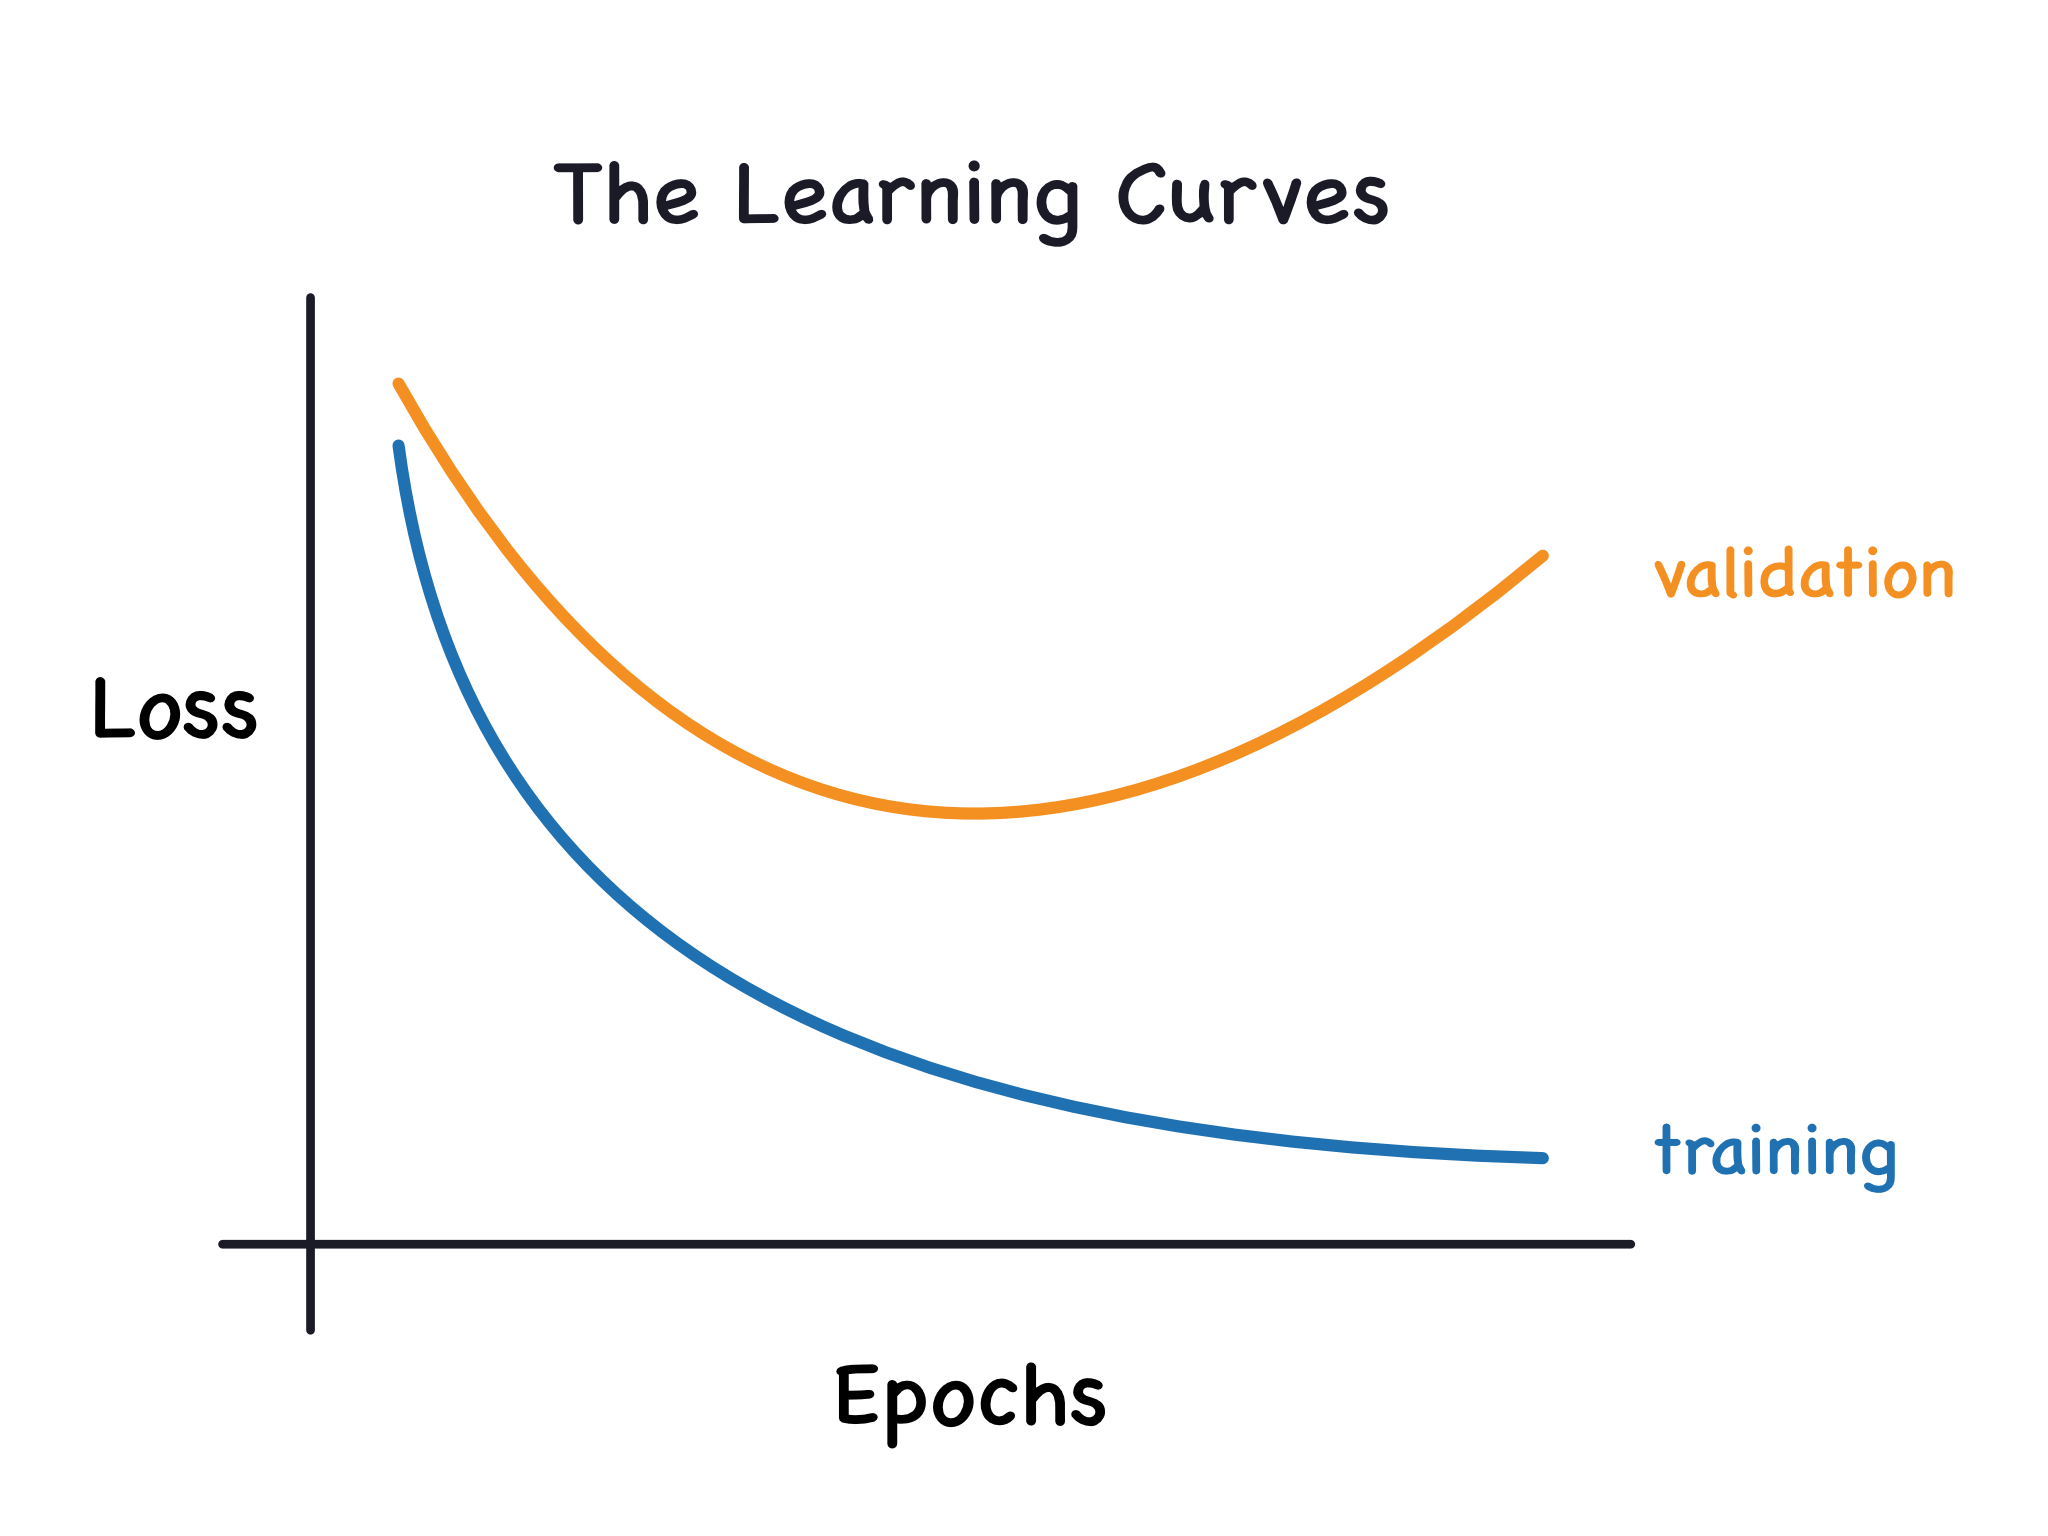

# Yapay Sinir Ağlarında Overfitting ve Underfitting

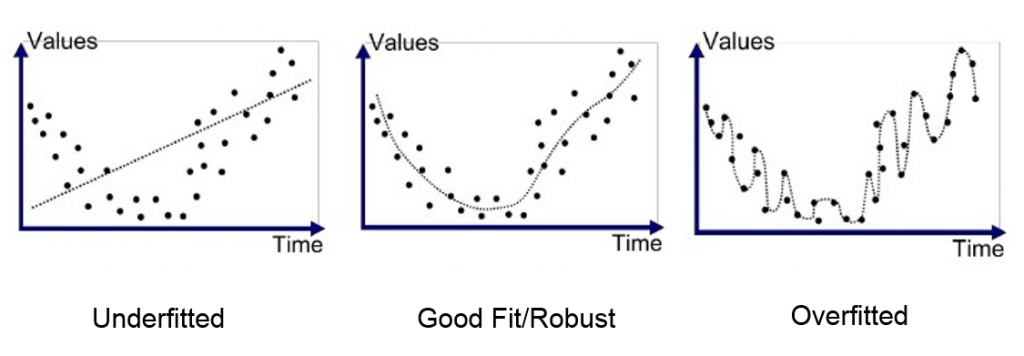

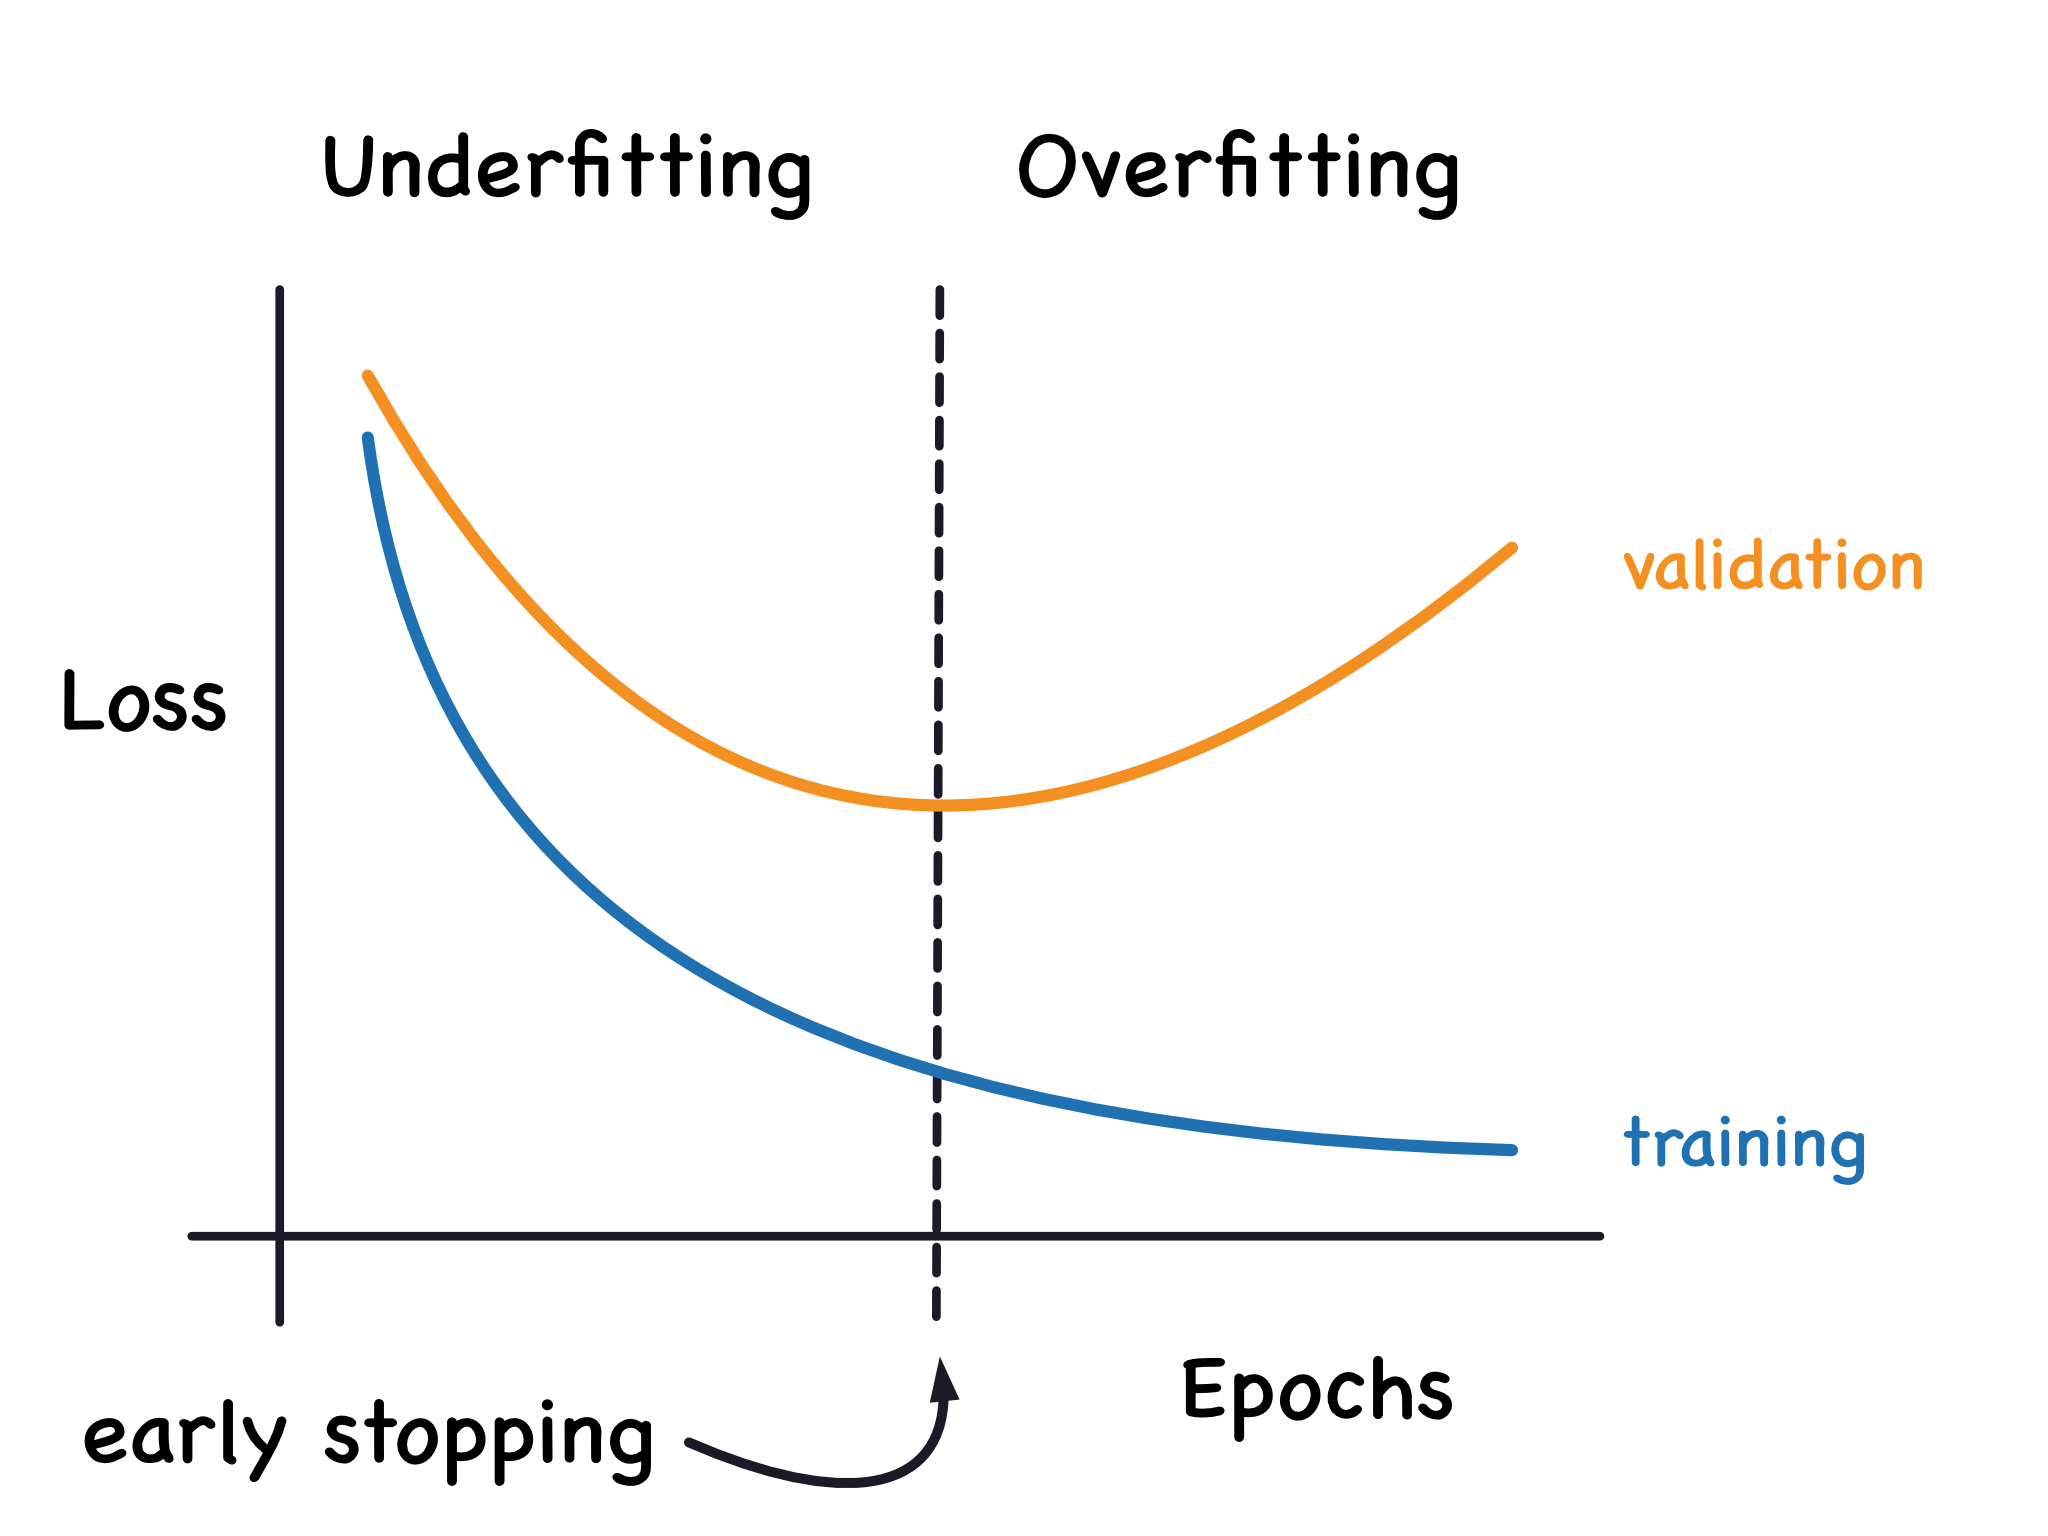

# Torch ile Sınıflandırma

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

In [ ]:
# Toplam kaç tane verimiz var
len(y)

In [ ]:
# Girdilerimizi Gorelim
X

In [ ]:
#Girdiler ne ifade ediyor?
feature_names

In [ ]:
# Hedeflerimize bir bakalim
y

In [ ]:
# Hedefler ne ifade ediyor?
names

In [ ]:
# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the data set into training&val and testing
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
print(f"{X_train_val.shape=}")
print(f"{X_test.shape=}")
print(f"{y_train_val.shape=}")
print(f"{y_test.shape=}")

In [ ]:
# Split the data set into training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [ ]:
print(f"{X_train.shape=}")
print(f"{X_val.shape=}")
print(f"{y_train.shape=}")
print(f"{y_val.shape=}")

In [ ]:
# Verimizi inceleyelim
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1], 
             linestyle='none', 
             marker='o', 
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3], 
             linestyle='none', 
             marker='o', 
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();

In [ ]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable

In [ ]:
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)     # <- Burası Önemli
        return x

In [ ]:
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

In [ ]:
model

In [ ]:
# numpy.ndarray -> torch.Tensor
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).long()
X_val   = torch.from_numpy(X_val).float()
y_val   = torch.from_numpy(y_val).long()
X_test  = torch.from_numpy(X_test).float()
y_test  = torch.from_numpy(y_test).long()

In [ ]:
import tqdm

EPOCHS  = 500

#Çıktılarımız
train_loss_list     = np.zeros((EPOCHS,))
train_accuracy_list = np.zeros((EPOCHS,))

val_loss_list     = np.zeros((EPOCHS,))
val_accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    
    # Training
    y_train_pred = model(X_train)
    train_loss = loss_fn(y_train_pred, y_train)
    train_loss_list[epoch] = train_loss.item()
    correct = (torch.argmax(y_train_pred, dim=1) == y_train).type(torch.FloatTensor)
    train_accuracy_list[epoch] = correct.mean()
    
    # Zero gradients
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    
    #Validation
    with torch.no_grad():
        y_val_pred = model(X_val)
        val_loss = loss_fn(y_val_pred, y_val)
        val_loss_list[epoch] = val_loss.item()
        correct = (torch.argmax(y_val_pred, dim=1) == y_val).type(torch.FloatTensor)
        val_accuracy_list[epoch] = correct.mean()

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(20, 12), sharex=True)

ax1.plot(train_accuracy_list, label = "Train")
ax1.plot(val_accuracy_list, label = "Validation")
ax1.legend()
ax1.set_ylabel("Accuracy")
ax2.plot(train_loss_list, label = "Train")
ax2.plot(val_loss_list, label = "Validation")
ax2.set_ylabel("Loss")
ax2.set_xlabel("Epochs")
ax2.legend()

In [ ]:
#Test
for y_label, y_pred in zip (y_test, model(X_test)):
    label = y_label.item()
    pred  = torch.argmax(y_pred).item()
    print("Label=", label, "\tPrediction=", pred, "\t", label == pred)